We start by importing any necessary packages for functionality in exploring and cleaning our data.

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Then, using the pandas built in file loader, we bring the data in.

In [72]:
file_path = "/Users/tyler/Desktop/ds_project-main/condenser_performance_dataset.csv"
condenser_data = pd.read_csv(file_path)

I like to get a general feel for what the data is and how it looks before fully exploring, so here I just use the .head() function for a quick glimpse.

In [73]:
condenser_data.head()

,Unnamed: 0,condenser_sequencer|AmbientTemperature,condenser_sequencer|DischargePressure,condenser_sequencer|RelativeHumidity,condenser_ec1|VfdSpeed,condenser_ec2|VfdSpeed,condenser_ec2|PumpRunStatus,condenser_ec1|PumpRunStatus,compressor_1|MotorCurrent,compressor_1|CalculatedCapacity,compressor_2|MotorCurrent,compressor_2|CalculatedCapacity,compressor_3|MotorCurrent,compressor_3|CalculatedCapacity,compressor_4|MotorCurrent,compressor_4|CalculatedCapacity,compressor_5|MotorCurrent,compressor_5|CalculatedCapacity,lowSide_1|Pressure,highSide_1|Pressure
0,2024-07-23 12:12:00-05:00,85.603210,147.816929,66.309696,100.0,0.0,True,True,230.948718,97.866667,344.769231,98.135897,192.102564,12.233333,0,0.1,313.051282,10.051282,2.056895,35.305792
1,2024-07-23 12:13:00-05:00,85.940984,148.579928,66.271260,100.0,0.0,True,True,260.758333,99.411667,344.433333,98.035000,192.650000,12.538333,0,0.1,314.566667,9.235000,2.312188,35.170674
2,2024-07-23 12:14:00-05:00,85.909826,149.496875,66.095088,100.0,0.0,True,True,251.130000,99.621667,364.866667,98.946667,195.100000,16.928333,0,0.1,315.266667,13.386667,2.180258,35.303510
3,2024-07-23 12:15:00-05:00,86.240929,149.654818,65.886366,100.0,0.0,True,True,256.266667,100.000000,350.016667,97.693333,195.100000,16.615000,0,0.1,315.800000,13.693333,2.245784,35.296434
4,2024-07-23 12:16:00-05:00,86.166792,149.918198,66.348929,100.0,0.0,True,True,251.936667,99.410000,305.650000,91.751667,196.083333,18.570000,0,0.1,316.866667,15.403333,2.380913,35.321795


Right away I see a column isn't labeled how I would like it, which you'll see me adjust a few rows down.

Here we can get a general overview of the scope of the data, with column names, amount of data per column, which gives us a glimpse into missing data as well.

In [74]:
print(condenser_data.info())
print(condenser_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30231 entries, 0 to 30230
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              30231 non-null  object 
 1   condenser_sequencer|AmbientTemperature  30231 non-null  float64
 2   condenser_sequencer|DischargePressure   30231 non-null  float64
 3   condenser_sequencer|RelativeHumidity    30231 non-null  float64
 4   condenser_ec1|VfdSpeed                  30231 non-null  float64
 5   condenser_ec2|VfdSpeed                  30231 non-null  float64
 6   condenser_ec2|PumpRunStatus             30231 non-null  bool   
 7   condenser_ec1|PumpRunStatus             30231 non-null  bool   
 8   compressor_1|MotorCurrent               29192 non-null  float64
 9   compressor_1|CalculatedCapacity         29192 non-null  float64
 10  compressor_2|MotorCurrent               29194 non-null  fl

In [75]:
print(condenser_data.isnull().sum())

Unnamed: 0                                   0
condenser_sequencer|AmbientTemperature       0
condenser_sequencer|DischargePressure        0
condenser_sequencer|RelativeHumidity         0
condenser_ec1|VfdSpeed                       0
condenser_ec2|VfdSpeed                       0
condenser_ec2|PumpRunStatus                  0
condenser_ec1|PumpRunStatus                  0
compressor_1|MotorCurrent                 1039
compressor_1|CalculatedCapacity           1039
compressor_2|MotorCurrent                 1037
compressor_2|CalculatedCapacity           1037
compressor_3|MotorCurrent                 1040
compressor_3|CalculatedCapacity           1040
compressor_4|MotorCurrent                    0
compressor_4|CalculatedCapacity              0
compressor_5|MotorCurrent                    0
compressor_5|CalculatedCapacity              0
lowSide_1|Pressure                           0
highSide_1|Pressure                          0
dtype: int64


In [76]:
# here we replace
condenser_data.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(condenser_data.isnull().sum())

Unnamed: 0                                0
condenser_sequencer|AmbientTemperature    0
condenser_sequencer|DischargePressure     0
condenser_sequencer|RelativeHumidity      0
condenser_ec1|VfdSpeed                    0
condenser_ec2|VfdSpeed                    0
condenser_ec2|PumpRunStatus               0
condenser_ec1|PumpRunStatus               0
compressor_1|MotorCurrent                 0
compressor_1|CalculatedCapacity           0
compressor_2|MotorCurrent                 0
compressor_2|CalculatedCapacity           0
compressor_3|MotorCurrent                 0
compressor_3|CalculatedCapacity           0
compressor_4|MotorCurrent                 0
compressor_4|CalculatedCapacity           0
compressor_5|MotorCurrent                 0
compressor_5|CalculatedCapacity           0
lowSide_1|Pressure                        0
highSide_1|Pressure                       0
dtype: int64


C:\Users\tyler\AppData\Local\Temp\ipykernel_29196\453594302.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  condenser_data.fillna(method='ffill', inplace=True)


In [77]:
condenser_data.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)

# Convert 'Timestamp' to datetime format
condenser_data['Timestamp'] = pd.to_datetime(condenser_data['Timestamp'])
condenser_data.sort_index(inplace=True)
# Verify the changes
print(condenser_data.head())

                  Timestamp  condenser_sequencer|AmbientTemperature  \
0 2024-07-23 12:12:00-05:00                               85.603210   
1 2024-07-23 12:13:00-05:00                               85.940984   
2 2024-07-23 12:14:00-05:00                               85.909826   
3 2024-07-23 12:15:00-05:00                               86.240929   
4 2024-07-23 12:16:00-05:00                               86.166792   

   condenser_sequencer|DischargePressure  \
0                             147.816929   
1                             148.579928   
2                             149.496875   
3                             149.654818   
4                             149.918198   

   condenser_sequencer|RelativeHumidity  condenser_ec1|VfdSpeed  \
0                             66.309696                   100.0   
1                             66.271260                   100.0   
2                             66.095088                   100.0   
3                             65.886366 

Below is a visualization of what the columns look like when cleaned of their null values using the ffill method (forward filling) - this provides further insight into inconsistencies in the discharge pressure graph later on.

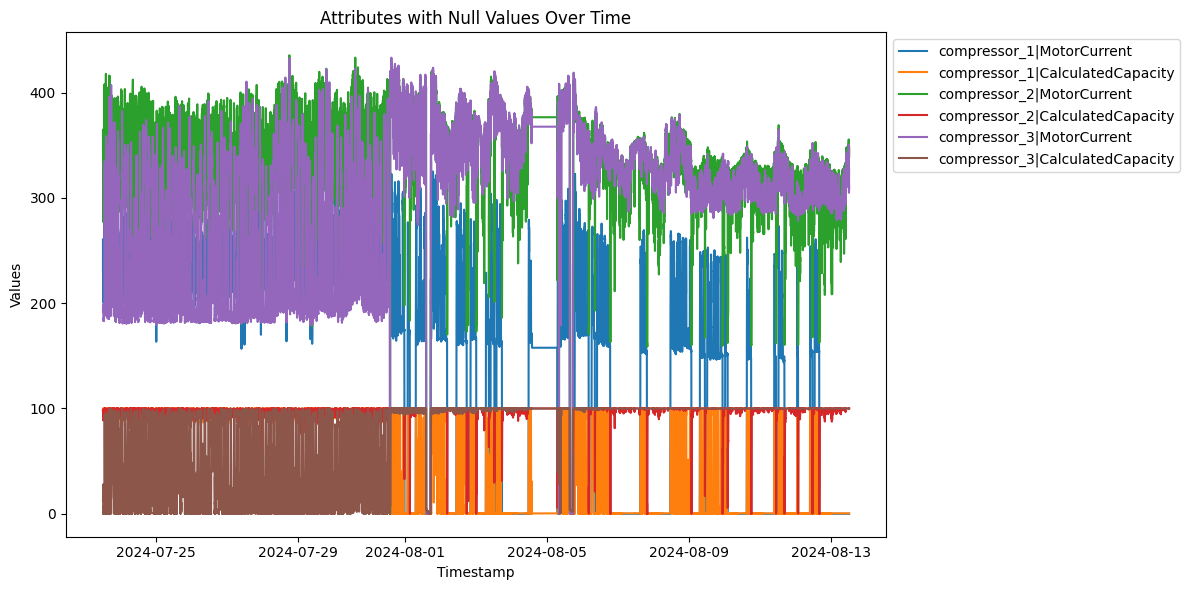

In [78]:
columns_with_nulls = [
    'compressor_1|MotorCurrent', 
    'compressor_1|CalculatedCapacity',
    'compressor_2|MotorCurrent', 
    'compressor_2|CalculatedCapacity',
    'compressor_3|MotorCurrent', 
    'compressor_3|CalculatedCapacity'
]

# Plot these columns over time
plt.figure(figsize=(12, 6))

for column in columns_with_nulls:
    plt.plot(condenser_data['Timestamp'], condenser_data[column], label=column)

# Add labels and title
plt.title('Attributes with Null Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Place the legend outside the plot
plt.tight_layout()  # Ensure everything fits well

# Show the plot
plt.show()

Ammonia system EDA (Exploratory Data Analysis)

Visualize Key Dependencies/ Correlations

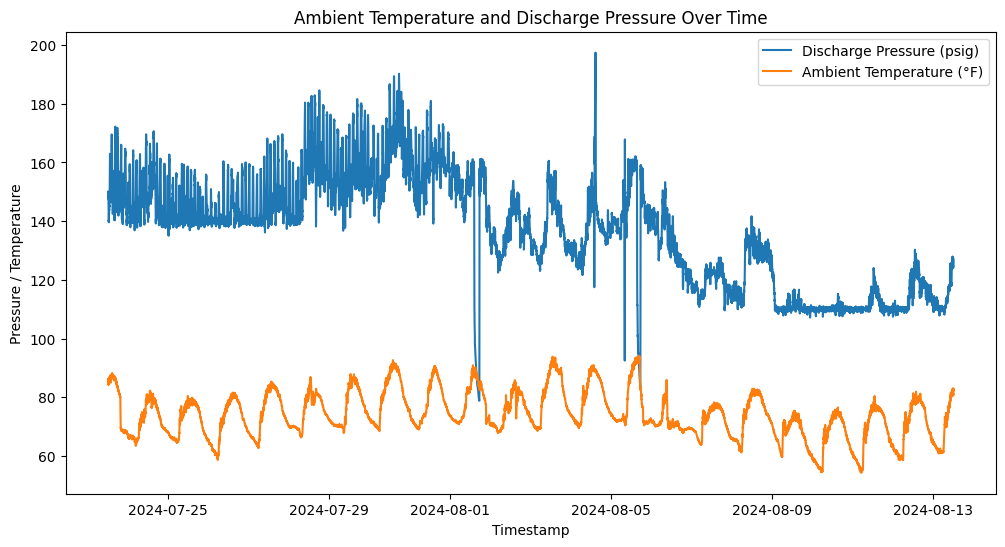

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(condenser_data['Timestamp'], condenser_data['condenser_sequencer|DischargePressure'], label='Discharge Pressure (psig)')
plt.plot(condenser_data['Timestamp'], condenser_data['condenser_sequencer|AmbientTemperature'], label='Ambient Temperature (°F)')
plt.title('Ambient Temperature and Discharge Pressure Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Pressure / Temperature')
plt.legend()
plt.show()

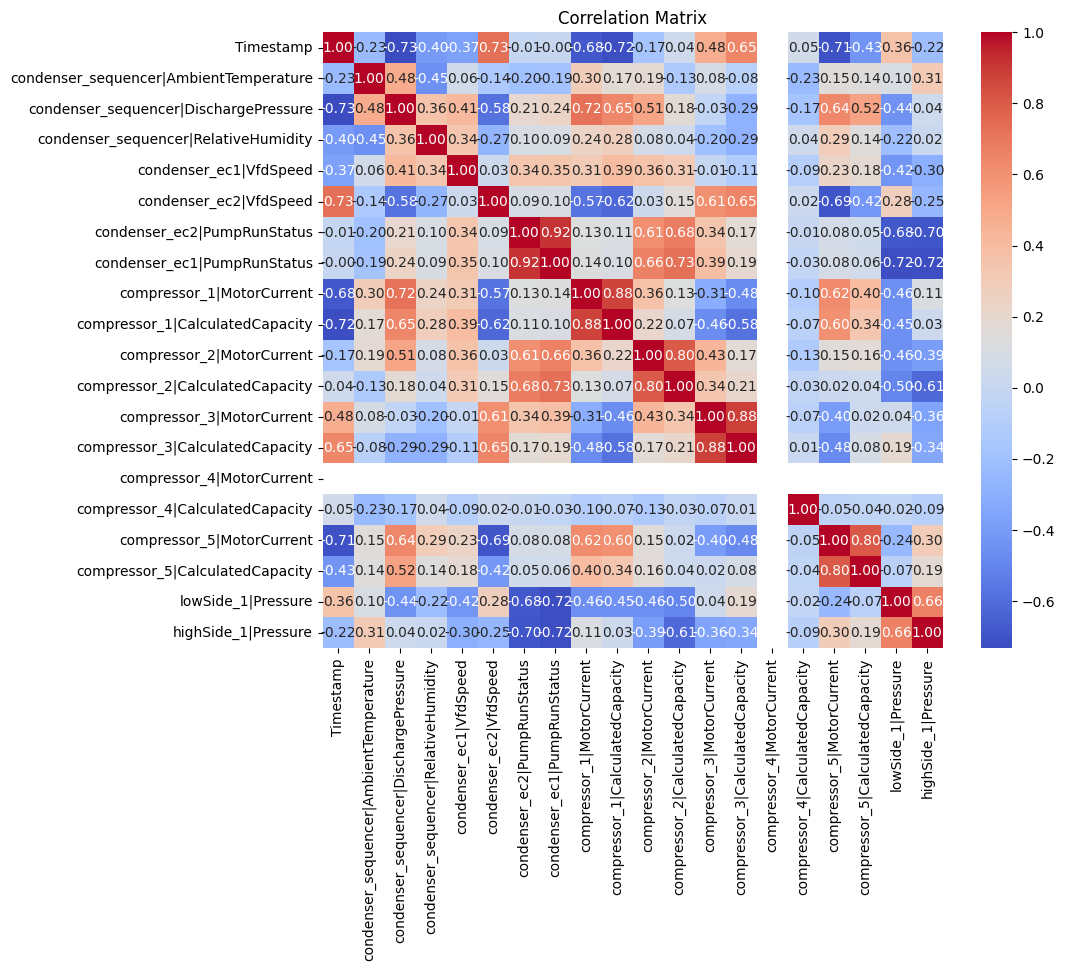

In [80]:
correlation_matrix = condenser_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

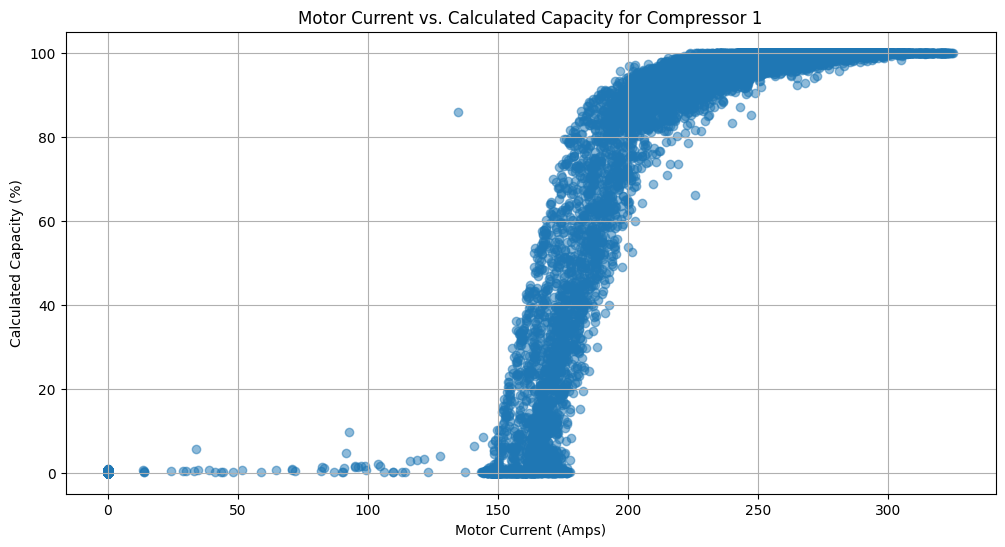

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(condenser_data['compressor_1|MotorCurrent'], condenser_data['compressor_1|CalculatedCapacity'], alpha=0.5)
plt.title('Motor Current vs. Calculated Capacity for Compressor 1')
plt.xlabel('Motor Current (Amps)')
plt.ylabel('Calculated Capacity (%)')
plt.grid()
plt.show()

This is a test for the predictive model using the RandomForestRegressor ML Model.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

Splitting the data into features and target variables (predictors and response)

In [83]:
features = condenser_data.drop(columns=['Timestamp', 'condenser_sequencer|DischargePressure'])
target = condenser_data['condenser_sequencer|DischargePressure']

The splitting the data into the training and test sets.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


We scale the data so the model has a better time learning from it.

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [87]:
y_pred = model.predict(X_test_scaled)

# metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.8780193177486665
Mean Squared Error: 2.673326778425659
R^2 Score: 0.9926021748630192


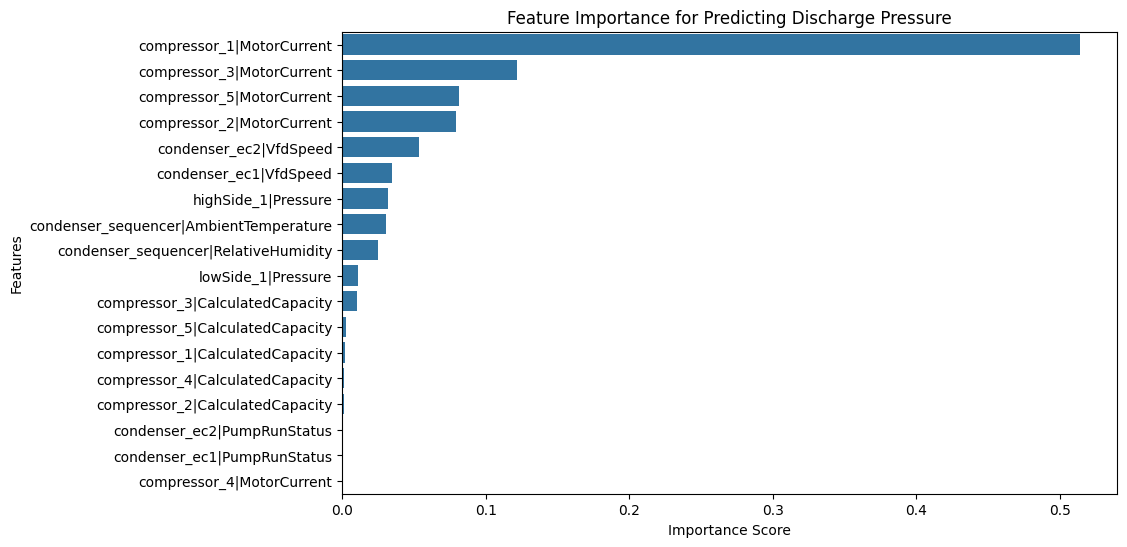

In [88]:
feature_importances = model.feature_importances_

# here a create a df for the important features that play a part in causing/ creating the discharge pressure
features_imp = X_train.columns  # extracting the column names for visualization
importance_df = pd.DataFrame({
    'Feature': features_imp,
    'Importance': feature_importances
})

# here we sort the features for visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# now we plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Discharge Pressure')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [89]:
columns_to_drop = ['condenser_ec2|PumpRunStatus', 'condenser_ec1|PumpRunStatus', 'compressor_4|MotorCurrent']

# drop the columns with no feature importance
condenser_data_imp = condenser_data.drop(columns=columns_to_drop)

In [90]:
from rf_model import RandomForestPredictor

Now that I've trained a model in which I am comfortable with presenting as an accurate predictive model, I am going to showcase the 3rd deliverable - calling the python module that loads in the model for deployment.

In [91]:
# for the sake of calling the RandomNForestPredictor from the rf_model file, we make new variables to showcase it working.

features2 = condenser_data_imp.drop(columns=['Timestamp', 'condenser_sequencer|DischargePressure'])
target2 = condenser_data_imp['condenser_sequencer|DischargePressure']

# create new train/ test sets for the model.
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42)

# create variable calling for the model function.
predictor = RandomForestPredictor()
predictor.train(X_train2, y_train2)

# make predictions as a function of the predictors for the response Discharge Pressure.
y_pred2 = predictor.predict(X_test2)



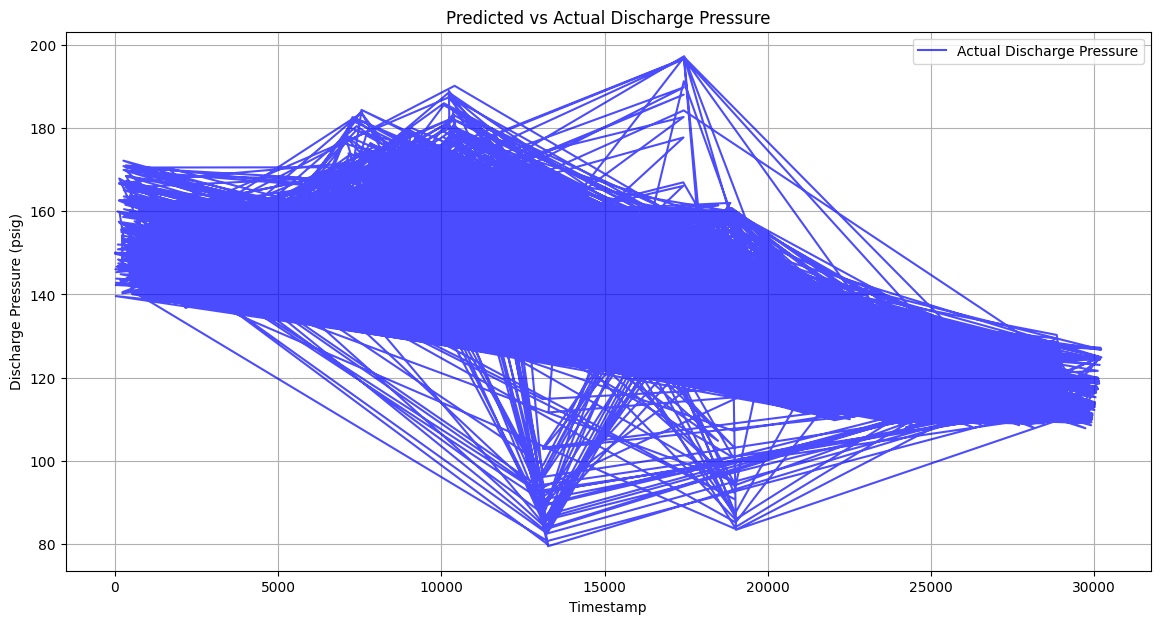

In [92]:
# here we show the actual discharge pressure to compare the prediction below.
plt.figure(figsize=(14, 7))
plt.plot(y_test2.index, y_test2, label='Actual Discharge Pressure', color='blue', alpha=0.7)
plt.title('Predicted vs Actual Discharge Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Discharge Pressure (psig)')
plt.legend()
plt.grid()
plt.show()

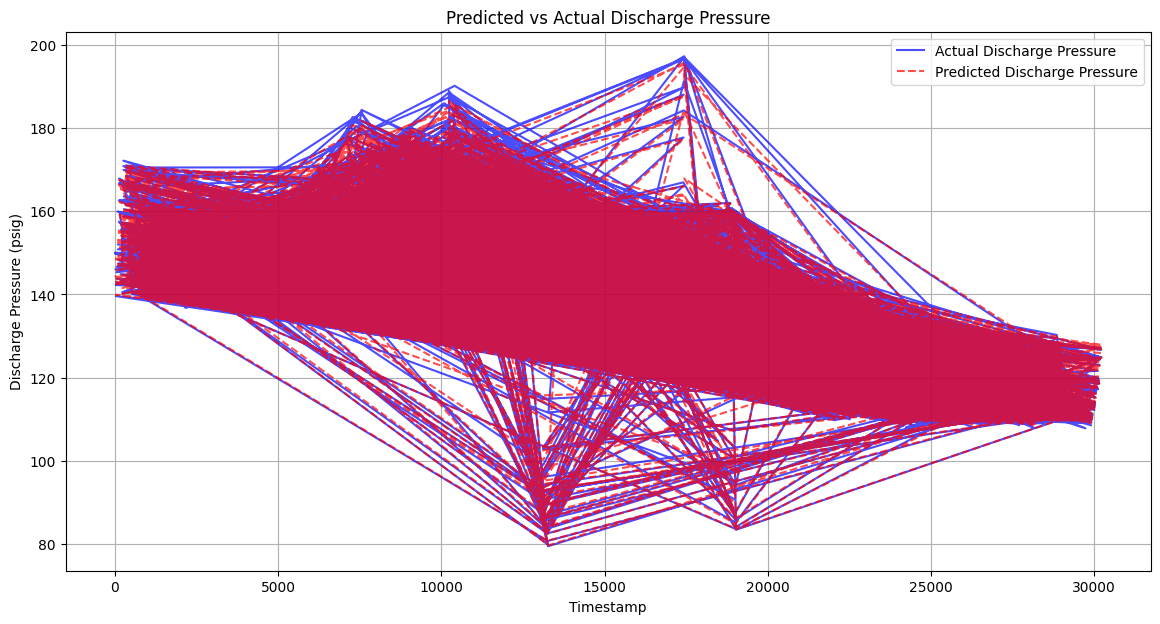

In [93]:
# visualize the predicted response versus the real value - another way of checking the performance of the model.
plt.figure(figsize=(14, 7))
plt.plot(y_test2.index, y_test2, label='Actual Discharge Pressure', color='blue', alpha=0.7)
plt.plot(y_test2.index, y_pred2, label='Predicted Discharge Pressure', color='red', linestyle='--', alpha=0.7)
plt.title('Predicted vs Actual Discharge Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Discharge Pressure (psig)')
plt.legend()
plt.grid()
plt.show()

In [94]:
predictor.save_model('discharge_rf_model.pkl')

Model saved to discharge_rf_model.pkl


In [95]:
loaded_predictor = RandomForestPredictor()
loaded_predictor.load_model('discharge_rf_model.pkl')

Model loaded from discharge_rf_model.pkl


In [96]:
y_pred2 = loaded_predictor.predict(X_test2)

mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

print(f'Mean Absolute Error: {mae2}')
print(f'Mean Squared Error: {mse2}')
print(f'R^2 Score: {r2_2}')

Mean Absolute Error: 0.8776611600272282
Mean Squared Error: 2.67409299562323
R^2 Score: 0.9926000545308209


Above was a model I figured worked fairly well, but then I did some more research and found this method, which made me quite curious so I attempted it: 

It worked much better than I would've imagined, so here is to problem solving!

Below I made a Graph Convolutional Neural Network where we imagine the system as a graph relationship - something I've done in social network analysis.

Specifying the features, and then connecting those nodes to Discharge pressure - as we want to predict that variable.

C:\Users\tyler\AppData\Local\Temp\ipykernel_29196\872515357.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features3 = condenser_data[node_features_columns].fillna(method='ffill').values


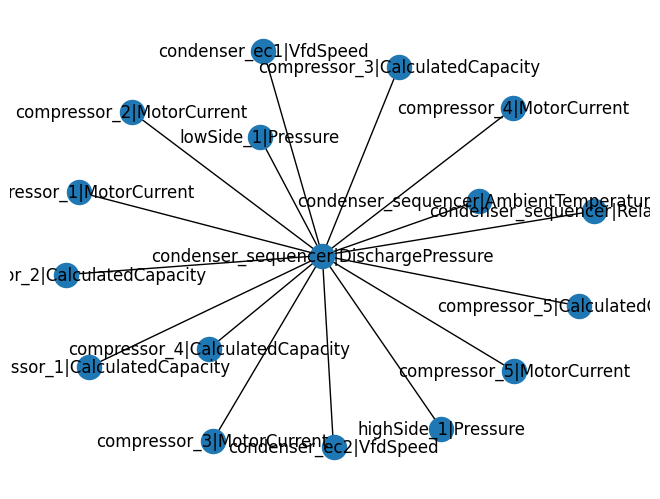

In [97]:
import torch
from torch_geometric.data import Data
import networkx as nx

node_features_columns = [
    'compressor_1|MotorCurrent',      # 0
    'compressor_1|CalculatedCapacity', # 1
    'compressor_2|MotorCurrent',      # 2
    'compressor_2|CalculatedCapacity', # 3
    'compressor_3|MotorCurrent',      # 4
    'compressor_3|CalculatedCapacity', # 5
    'compressor_4|MotorCurrent',      # 6
    'compressor_4|CalculatedCapacity', # 7
    'compressor_5|MotorCurrent',      # 8
    'compressor_5|CalculatedCapacity', # 9
    'condenser_ec1|VfdSpeed',         # 10
    'condenser_ec2|VfdSpeed',         # 11
    'highSide_1|Pressure',            # 12
    'lowSide_1|Pressure',             # 13
    'condenser_sequencer|RelativeHumidity', # 14
    'condenser_sequencer|DischargePressure', # 15
    'condenser_sequencer|AmbientTemperature'  # 16
]

# normalize node features
features3 = condenser_data[node_features_columns].fillna(method='ffill').values
features3 = scaler.fit_transform(condenser_data[node_features_columns])

# create a graph with nodes representing the sensors
G = nx.Graph()

# add nodes for each feature
for i, feature in enumerate(node_features_columns):
    G.add_node(i, name=feature)

# define edges (logical connections between components)
edges = [
    (0, 15), (1, 15),  # compressor_1 to discharge pressure.
    (2, 15), (3, 15),  # compressor_2 to discharge pressure.
    (4, 15), (5, 15),  # compressor_3 to discharge pressure.
    (6, 15), (7, 15),  # compressor_4 to discharge pressure.
    (8, 15), (9, 15),  # compressor_5 to discharge pressure.
    (10, 15), (11, 15),# VfdSpeed from EC1 and EC2 to discharge pressure.
    (12, 15),          # High Side Pressure to discharge pressure.
    (13, 15),          # Low Side Pressure to discharge pressure.
    (14, 15),          # Relative Humidity to discharge pressure.
    (15, 16)           # discharge pressure to ambient temperature.
]
G.add_edges_from(edges)

# just to show the graph representation.
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'name'))

# extract node features and edge index for GNN input
node_features = torch.tensor(features3, dtype=torch.float)
edge_index = torch.tensor(np.array(edges).T, dtype=torch.long)

Then I made a GNN class file to deploy and utilize the model:

In [98]:
from GNN import GNN
# this is for the input dimensions
input_dim = node_features.shape[1]  # number of features per node
hidden_dim = 16  # You can tweak this
output_dim = 1  # for predicting the discharge pressure

# initialize the model
model = GNN(input_dim, hidden_dim, output_dim)

Below we split the data into test and training sets, using the actual condenser_data length for the right amount of data to randomly parse through for our sets.

Then we train the model and eventually check the prediction ability of the model - which is quite satisfactory

In [105]:
from torch.optim import Adam

# training setup
optimizer = Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# split the data into features for training and testing
train_mask = np.random.rand(len(condenser_data)) < 0.8  # random sampling for 80-20 split
train_features = node_features[train_mask]
test_features = node_features[~train_mask]

# training the model
model.train()
for epoch in range(400):  # 400 epochs for the model to train.
    optimizer.zero_grad()
    
    # Forward pass
    out = model(train_features, edge_index)
    
    # predicting 
    loss = criterion(out[:, 0], train_features[:, 15])  # here we pull the feature to the discharge pressure, which is node 6.
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# checking the prediction power
model.eval()
with torch.no_grad():
    test_out = model(test_features, edge_index)
    test_loss = criterion(test_out[:, 0], test_features[:, 15])
    print(f'Test Loss: {test_loss.item()}')

Epoch 0, Loss: 0.012218321673572063
Epoch 10, Loss: 0.009200604632496834
Epoch 20, Loss: 0.006666744593530893
Epoch 30, Loss: 0.004838695749640465
Epoch 40, Loss: 0.0035754868295043707
Epoch 50, Loss: 0.002772396430373192
Epoch 60, Loss: 0.002255316823720932
Epoch 70, Loss: 0.0018923660973086953
Epoch 80, Loss: 0.0016266832826659083
Epoch 90, Loss: 0.0014180117286741734
Epoch 100, Loss: 0.001249465043656528
Epoch 110, Loss: 0.0011074139038100839
Epoch 120, Loss: 0.0009898319840431213
Epoch 130, Loss: 0.0008967556059360504
Epoch 140, Loss: 0.0008217563154175878
Epoch 150, Loss: 0.0007604107959195971
Epoch 160, Loss: 0.0007096140761859715
Epoch 170, Loss: 0.0006668127025477588
Epoch 180, Loss: 0.0006292031612247229
Epoch 190, Loss: 0.0005967585020698607
Test Loss: 0.0009726614807732403


Then below, for showcasing purposes, I show the original graph and then compare that to the predicted graph, showing how well of a fit the model is to the data.

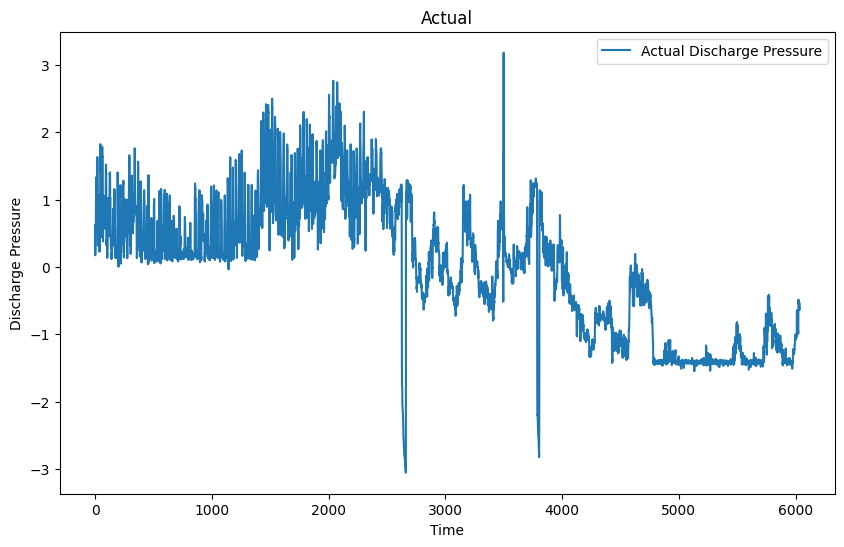

In [106]:
actuals = test_features[:, 15].numpy()

# plotting actual 
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Discharge Pressure')
plt.title('Actual')
plt.xlabel('Time')
plt.ylabel('Discharge Pressure')
plt.legend()
plt.show()

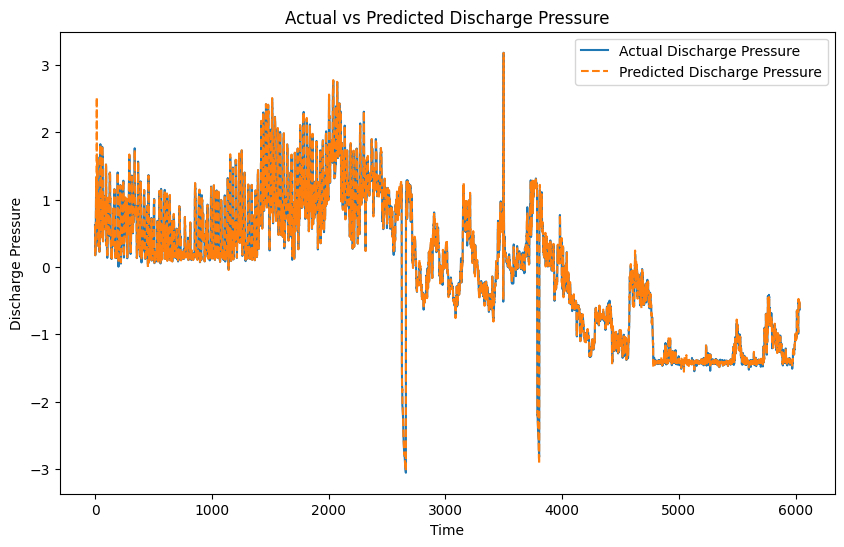

In [107]:
# pulling predictions for the visualization
predictions = test_out[:, 0].detach().numpy()
actuals = test_features[:, 15].numpy()

# plotting actual vs predicted.
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='Actual Discharge Pressure')
plt.plot(predictions, label='Predicted Discharge Pressure', linestyle='--')
plt.title('Actual vs Predicted Discharge Pressure')
plt.xlabel('Time')
plt.ylabel('Discharge Pressure')
plt.legend()
plt.show()

In [102]:
model.save_model('gnn_model.pkl') # saving the trained model

Model saved to gnn_model.pkl


In [103]:
model.load_model('gnn_model.pkl')

Model loaded from gnn_model.pkl


In [104]:
model.eval()
with torch.no_grad():
    test_out = model(test_features, edge_index)
    test_loss = criterion(test_out[:, 0], test_features[:, 15])
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.012839541770517826
